# Pattern Recognition: Noise Reduction

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
def apply_gaussian_filter(image: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    """
    Apply a Gaussian filter to reduce noise in an image.

    Args:
        image (np.ndarray): The input image to be filtered.
        kernel (np.ndarray): The Gaussian kernel to be applied for filtering.

    Returns:
        np.ndarray: The filtered image.
    """
    return cv2.filter2D(image, -1, kernel)

In [3]:
def generate_gaussian_kernel(size: int = 3, sigma: float = 1.0) -> np.ndarray:
    """
    Generate a normalized 2D Gaussian kernel.

    Args:
        size (int): Size of the kernel (e.g., 3x3, 5x5).
        sigma (float): Standard deviation of the Gaussian distribution.

    Returns:
        np.ndarray: A 2D Gaussian kernel.
    """
    kernel_1d = cv2.getGaussianKernel(size, sigma)
    kernel_2d = kernel_1d @ kernel_1d.T
    return kernel_2d / np.sum(kernel_2d)

In [4]:
def add_salt_and_pepper_noise(image: np.ndarray, amount: float = 0.05) -> np.ndarray:
    """
    Add salt-and-pepper noise to an image.

    Args:
        image (np.ndarray): The input image to add noise to.
        amount (float): The proportion of pixels to be affected by noise (0 to 1).

    Returns:
        np.ndarray: The noisy image.
    """
    noisy_image = image.copy()
    total_pixels = noisy_image.size
    num_salt = int(amount * total_pixels * 0.5)
    num_pepper = int(amount * total_pixels * 0.5)

    # Salt noise (white pixels)
    salt_coords = [np.random.randint(0, dim - 1, num_salt) for dim in noisy_image.shape]
    noisy_image[salt_coords[0], salt_coords[1]] = 255

    # Pepper noise (black pixels)
    pepper_coords = [np.random.randint(0, dim - 1, num_pepper) for dim in noisy_image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0

    return noisy_image

In [5]:
def plot_images(original: np.ndarray, noisy: np.ndarray, filtered: np.ndarray) -> None:
    """
    Plot the original, noisy, and filtered images side by side.

    Args:
        original (np.ndarray): The original image.
        noisy (np.ndarray): The noisy image.
        filtered (np.ndarray): The filtered image.

    Returns:
        None
    """
    plt.figure(figsize=(15, 5))

    # Original Image
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(original, cmap='gray')
    plt.axis('off')

    # Noisy Image
    plt.subplot(1, 3, 2)
    plt.title("Noisy Image")
    plt.imshow(noisy, cmap='gray')
    plt.axis('off')

    # Filtered Image
    plt.subplot(1, 3, 3)
    plt.title("Filtered Image")
    plt.imshow(filtered, cmap='gray')
    plt.axis('off')

    plt.show()

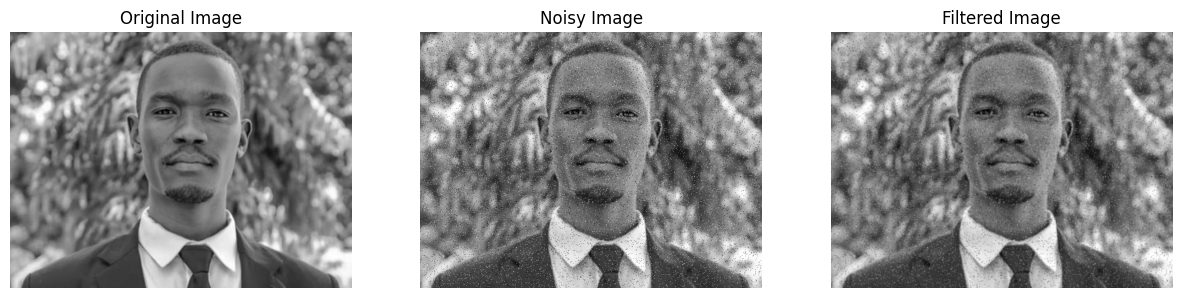

In [6]:
def main() -> None:
    """
    Main function to demonstrate noise reduction using a Gaussian filter.
    Loads an image, adds salt-and-pepper noise, applies a Gaussian filter,
    and plots the original, noisy, and filtered images.

    Returns:
        None
    """
    # Load the image in grayscale
    image = cv2.imread('/content/original.jpg', cv2.IMREAD_GRAYSCALE)

    if image is None:
        raise FileNotFoundError("Image not found. Please check the file path.")

    # Add salt-and-pepper noise to the image
    noisy_image = add_salt_and_pepper_noise(image, amount=0.05)

    # Generate a 3x3 Gaussian kernel
    gaussian_kernel = generate_gaussian_kernel(size=3, sigma=1)

    # Apply the Gaussian filter to the noisy image
    filtered_image = apply_gaussian_filter(noisy_image, gaussian_kernel)

    # Plot the images
    plot_images(original=image, noisy=noisy_image, filtered=filtered_image)


if __name__ == "__main__":
    main()
